<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [40]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [41]:
#import ssl
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
url='housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



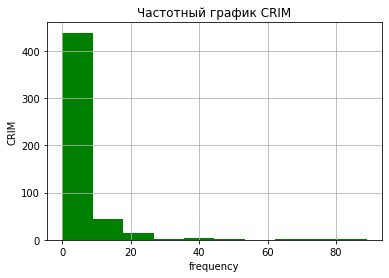

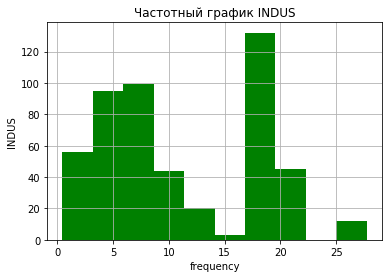

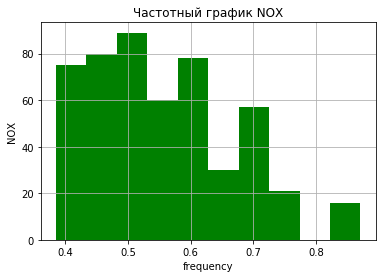

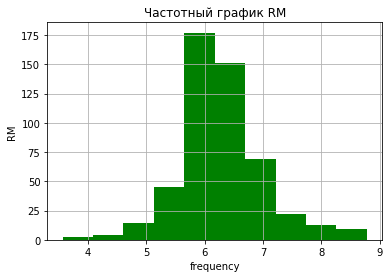

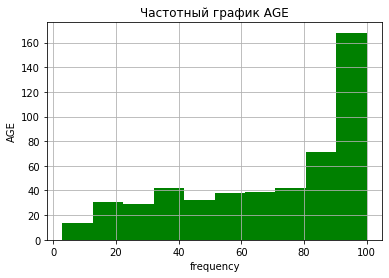

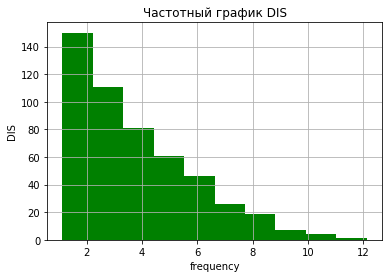

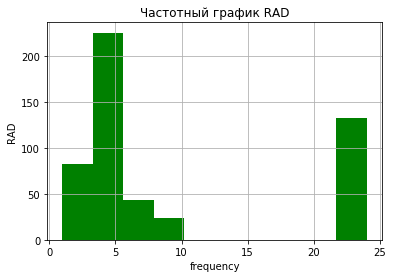

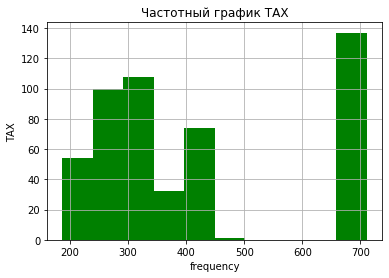

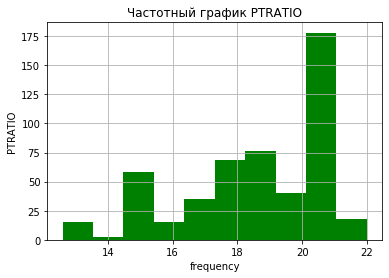

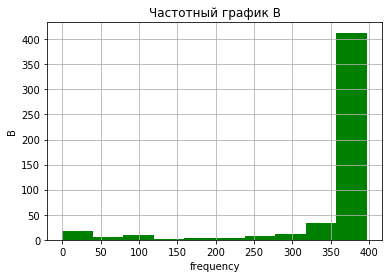

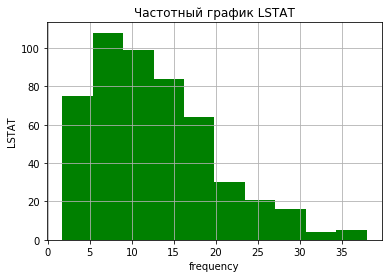

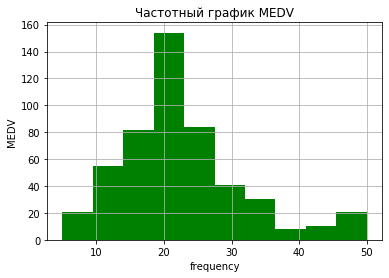

In [44]:
plt.hist(data['CRIM'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('CRIM')
plt.title('Частотный график CRIM')
plt.grid(True)
plt.show()
plt.hist(data['INDUS'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('INDUS')
plt.title('Частотный график INDUS')
plt.grid(True)
plt.show()
plt.hist(data['NOX'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('NOX')
plt.title('Частотный график NOX')
plt.grid(True)
plt.show()

plt.hist(data['RM'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('RM')
plt.title('Частотный график RM')
plt.grid(True)
plt.show()

plt.hist(data['AGE'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('AGE')
plt.title('Частотный график AGE')
plt.grid(True)
plt.show()
plt.hist(data['DIS'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('DIS')
plt.title('Частотный график DIS')
plt.grid(True)
plt.show()
plt.hist(data['RAD'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('RAD')
plt.title('Частотный график RAD')
plt.grid(True)
plt.show()
plt.hist(data['TAX'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('TAX')
plt.title('Частотный график TAX')
plt.grid(True)
plt.show()
plt.hist(data['PTRATIO'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('PTRATIO')
plt.title('Частотный график PTRATIO')
plt.grid(True)
plt.show()
plt.hist(data['B'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('B')
plt.title('Частотный график B')
plt.grid(True)
plt.show()
plt.hist(data['LSTAT'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('LSTAT')
plt.title('Частотный график LSTAT')
plt.grid(True)
plt.show()
plt.hist(data['MEDV'], facecolor='g')
plt.xlabel('frequency')
plt.ylabel('MEDV')
plt.title('Частотный график MEDV')
plt.grid(True)
plt.show()

DIS - Это экспоненциальное распределение, значения непрерывные увеличиваются к 0
RM, MEDV - нормальное распределение
LSTAT - Логнормальное
RAD - биноминальное ?

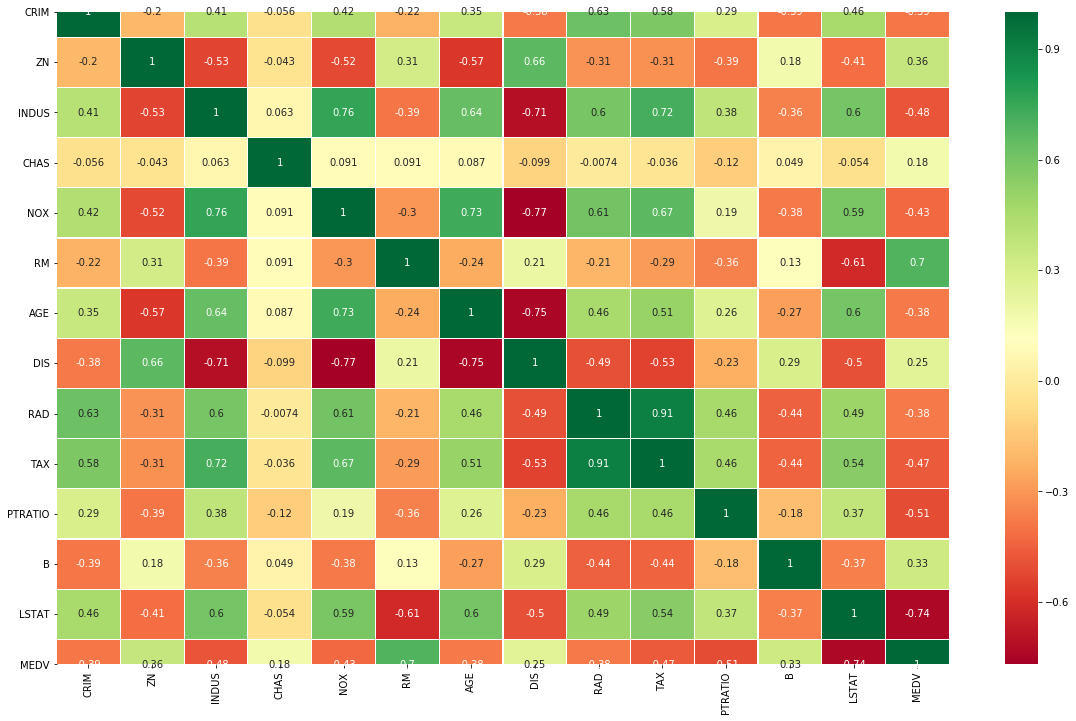

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

In [27]:
MEDV = np.array(data['MEDV']).reshape(-1,1)
LSTAT = np.array(data['LSTAT']).reshape(-1,1)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    MEDV,
    LSTAT,
    test_size = 0.2
)



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [32]:
model.fit(X_train, y_train)
# предсказание модели 
predicted_y = model.predict(X_test)
# ошибка модели
model.score(X_test, y_test)
# 54% точности для тестовых данных 

0.5423077707025994

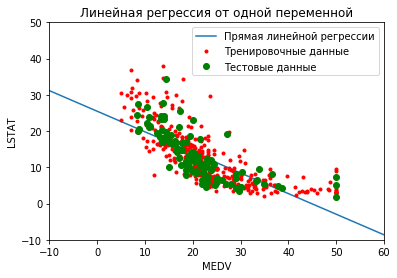

In [38]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 60, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,60)
plt.ylim(-10,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [60]:
url="world-happiness-report-2019.csv"
data2=pd.read_csv(url)
data2.head(100)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
95,Cameroon,96,131,106.0,129.0,129.0,90.0,120.0,91.0,121.0,141.0
96,Bulgaria,97,47,117.0,13.0,18.0,115.0,147.0,112.0,56.0,65.0
97,Ghana,98,129,92.0,72.0,132.0,91.0,117.0,52.0,114.0,121.0
98,Ivory Coast,99,134,88.0,130.0,137.0,100.0,62.0,114.0,118.0,147.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [65]:
data2 = data2.drop(np.where(data2['Country (region)'].isnull())[0])
len(data2)


156

Сколько стран в выборке? Написать ответ. 

In [69]:
len(data2['Country (region)'].unique())

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

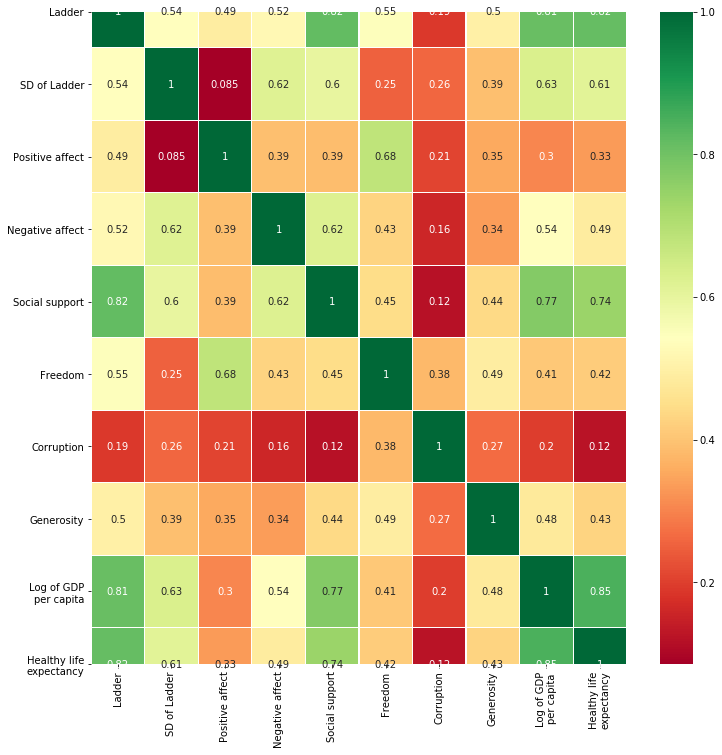

In [71]:
sns.heatmap(data2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Есть несколько каррелирующих между сообой показателей со значением больше 0.8
Ladder и Social Support например

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

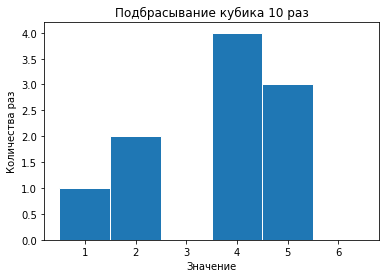

In [80]:
# Количество испытаний
trials = 10
# Массив значений - нормальное распределение
values = np.random.randint(1, 7, trials)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')
plt.xlabel('Значение')
plt.ylabel('Количества раз')
plt.title('Подбрасывание кубика ' + str(trials) + ' раз')
plt.show()

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

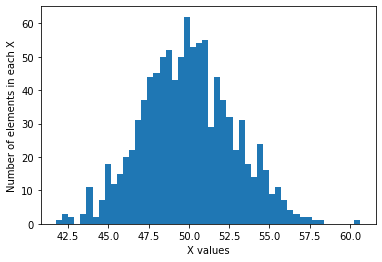

In [82]:
number_of_sums = 1000
number_of_randoms = 100
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(np.random.rand(number_of_randoms))#/number_of_randoms
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

In [ ]:
сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы 
(ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), 
имеет распределение, близкое к нормальному